In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import plotly.express as px
import seaborn as sns

In [6]:

df = pd.read_csv("Crypto and Energy.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.drop(columns=["Unnamed: 0"])
df.set_index("Date", inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1243 entries, 2019-02-04 to 2024-02-02
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bitcoin_Price      1243 non-null   float64
 1   Bitcoin_Vol.       1243 non-null   float64
 2   Ethereum_Price     1243 non-null   float64
 3   Ethereum_Vol.      1243 non-null   float64
 4   Natural_Gas_Price  1243 non-null   float64
 5   Natural_Gas_Vol.   1242 non-null   float64
 6   Crude_oil_Price    1243 non-null   float64
 7   Crude_oil_Vol.     1242 non-null   float64
dtypes: float64(8)
memory usage: 87.4 KB


In [8]:
df.describe()

,Bitcoin_Price,Bitcoin_Vol.,Ethereum_Price,Ethereum_Vol.,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.
count,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1243.000000,1242.000000,1243.000000,1.242000e+03
mean,25241.903057,4.033918e+07,1445.815133,1.801563e+07,3.494714,131548.542673,67.607337,3.943149e+05
std,16029.009055,2.940889e+08,1160.674814,1.326933e+08,1.822540,64341.282198,20.337177,2.169477e+05
min,3397.700000,2.600000e+02,104.550000,7.518000e+04,1.482000,1200.000000,0.000000,1.702000e+04
25%,10014.600000,7.907500e+04,244.080000,5.883600e+05,2.347500,91690.000000,55.095000,2.773950e+05
50%,23055.100000,2.153100e+05,1552.600000,1.570000e+06,2.702000,127310.000000,69.230000,3.645800e+05
75%,37784.200000,6.151050e+05,2056.555000,9.365000e+06,4.055500,169390.000000,80.455000,5.021450e+05
max,67527.900000,4.470000e+09,4808.380000,1.790000e+09,9.647000,381970.000000,123.700000,1.770000e+06


In [9]:
def heatmap_corr(df):
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(df, dtype=bool))
    df = df.iloc[1:, :-1]
    sns.heatmap(df, mask=mask[1:,:-1], cmap='coolwarm', fmt=".2f", linewidths=0.5,annot=True,vmin=-1,vmax=1)
    plt.title('Biểu đồ Heatmap tương quan')
    plt.show()

c:\Users\Admin\anaconda3\envs\env_ds\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


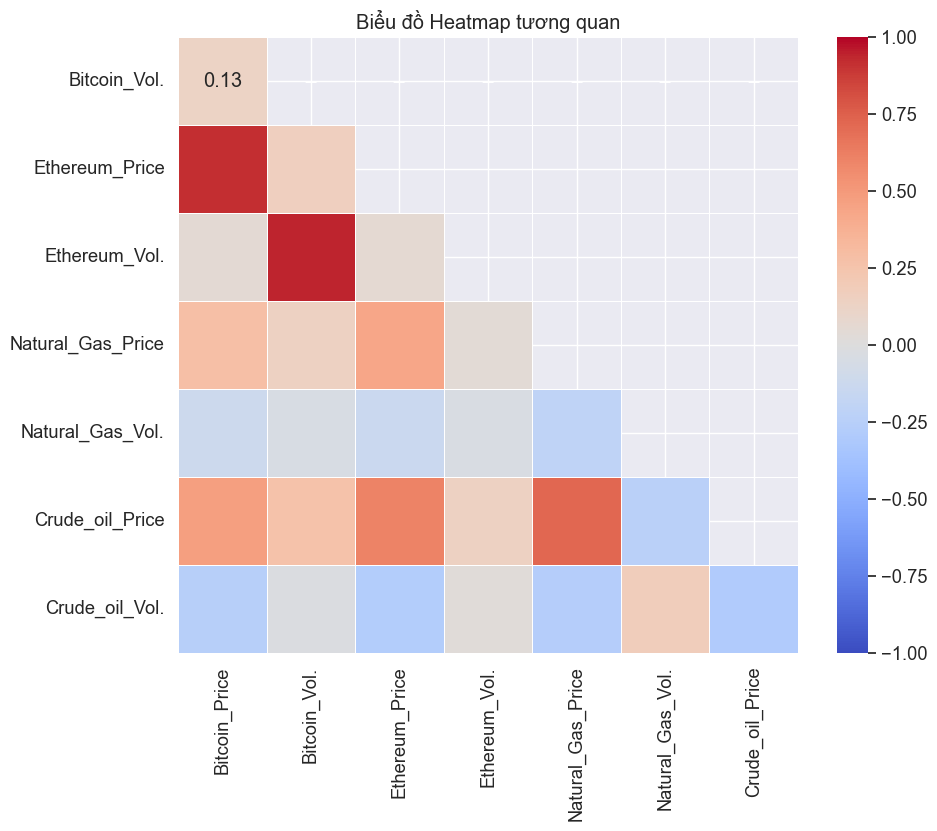

In [10]:
heatmap_corr(df.corr())

In [11]:
columns = df.columns
price = [col for col in columns if 'Price' in col]
volume = [col for col in columns if 'Vol.' in col]
name = [x.replace('_Price','') for x in price]


In [12]:
growth_rates = {}

for stock in price:
    start_price = df[stock].iloc[0]
    end_price = df[stock].iloc[-1]
    growth_rate = (end_price - start_price) / start_price * 100
    growth_rates[stock] = growth_rate
df_growth = pd.DataFrame(list(growth_rates.items()), columns=['Stock', 'Growth Rate'])
fig = px.bar(df_growth, x='Growth Rate', y='Stock', orientation='h', labels={'Growth Rate': 'Growth Rate (%)', 'Stock': 'Stock'}, title='Thông kê tốc độ tăng trưởng')
fig.show()

In [13]:
daily_return = [x.replace('Price','Daily_Return') for x in price]
name = [x.replace('Price', '') for x in price]
df[daily_return] = df[price].pct_change() * 100
df= df.fillna(0)

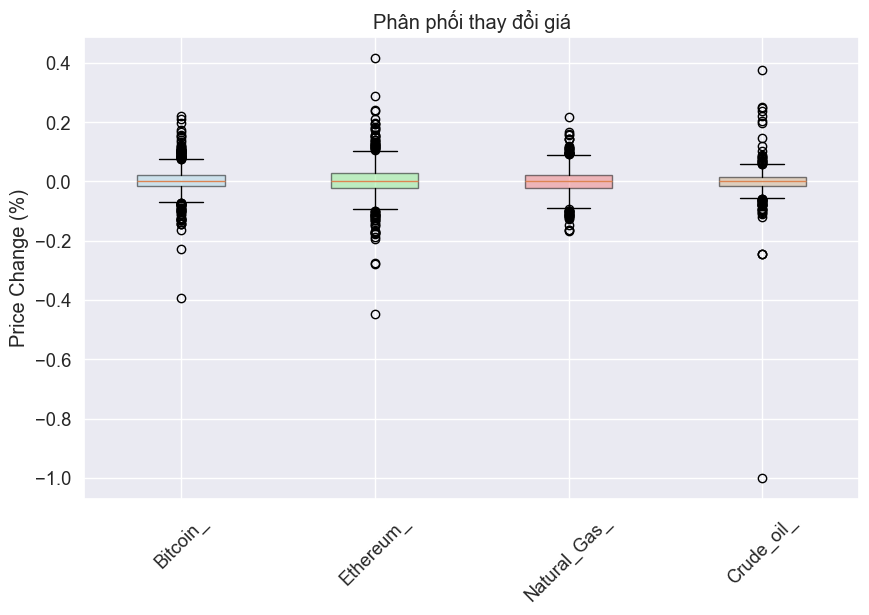

In [14]:
daily_return_array = df[price].pct_change().dropna()

plt.figure(figsize=(10, 6))
box = plt.boxplot(daily_return_array.values, labels=name, patch_artist=True)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'tan', 'lightpink', 'lightsalmon', 'orange', 'lightyellow', 'lightseagreen', 'lightgray']
for patch, color in zip(box['boxes'], colors):
    patch.set(facecolor=color, alpha=0.5)  # Tinh chỉnh màu sắc và độ trong suốt

plt.title('Phân phối thay đổi giá')
plt.ylabel('Price Change (%)')
plt.xticks(rotation=45)

plt.show()

In [15]:
df_price = df[price]
df_price_new= df_price/df_price.iloc[0]

c:\Users\Admin\anaconda3\envs\env_ds\lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



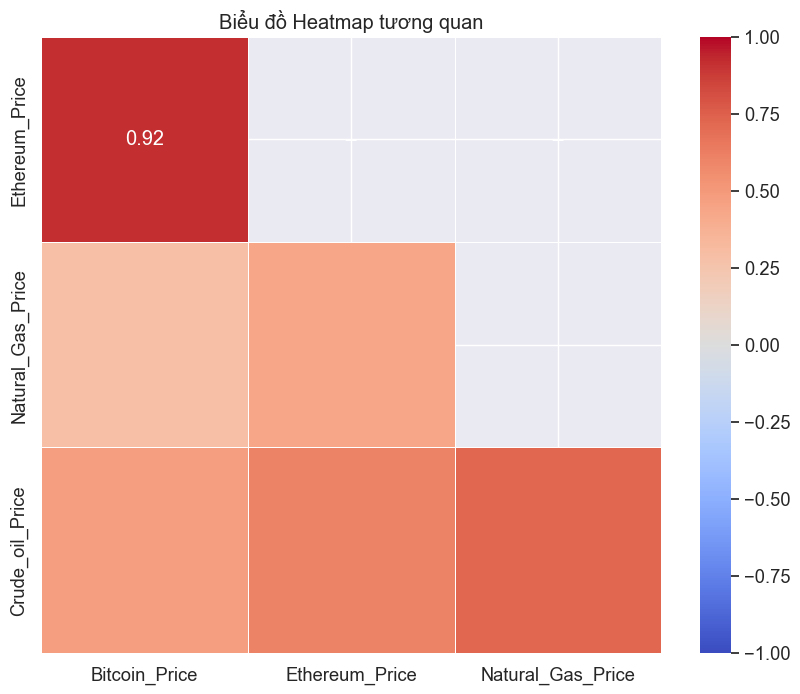

In [16]:
df_corr_price = df_price_new.corr()
heatmap_corr(df_corr_price)

In [17]:
fig = px.line(data_frame=df_price_new,title='Bảng thông kê giá cả tổng quan')
fig.show()

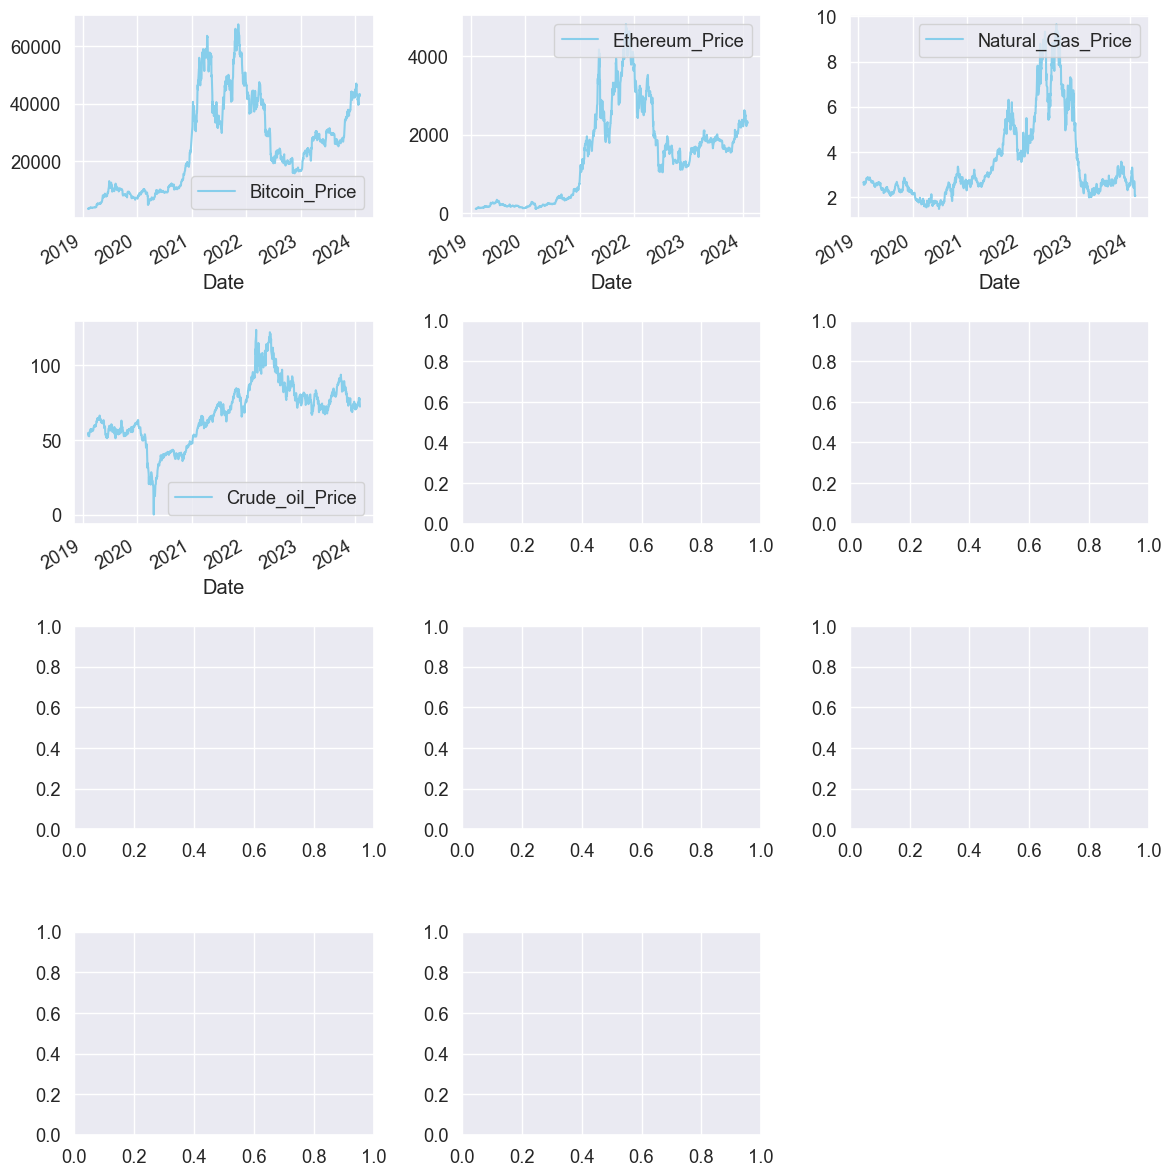

In [ ]:
n_cols = 2
n_rows = 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*8))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c  # index to loop through list "cols"
        if i < len(price):
            ax_i = ax[r, c]
            df.plot(y=price[i], figsize=(12,12), ax=ax_i,color='skyblue')
ax.flat[-1].set_visible(False) 
plt.tight_layout()
plt.show()

In [19]:
daily_return = [x.replace('Price','Daily_Return') for x in price]
name = [x.replace('Price', '') for x in price]
df[daily_return] = df[price].pct_change() * 100
df= df.fillna(0)

In [20]:
mean_daily_return_day = 0
mean_daily_return_year = 0
price_volatility=0
mean_daily_return_array_day = []
mean_daily_return_array_year = []
price_volatility_array =[]
for i in daily_return :
    mean_daily_return_day = df[i].mean()
    mean_daily_return_year=mean_daily_return_day*365
    price_volatility = df[i].std()
    price_volatility_array.append(price_volatility)
    mean_daily_return_array_day.append(mean_daily_return_day)
    mean_daily_return_array_year.append(mean_daily_return_year)
    

Đậy là loại dashboard cơ mà cột không nhất thiết phải dashboard

In [22]:
# data_visual = pd.DataFrame({'Stock': price, 'Price_Volatility': price_volatility_array, 'Year_Return': mean_daily_return_array_year})

# fig = px.histogram(data_frame=data_visual, x='Stock', y='Year_Return',title='Bảng trung bình lợi nhuận hàng năm')
# fig.show()

In [23]:
# fig = px.histogram(data_frame=data_visual, x='Stock', y='Price_Volatility',title='Bảng biến động giá hàng ngày')
# fig.show()

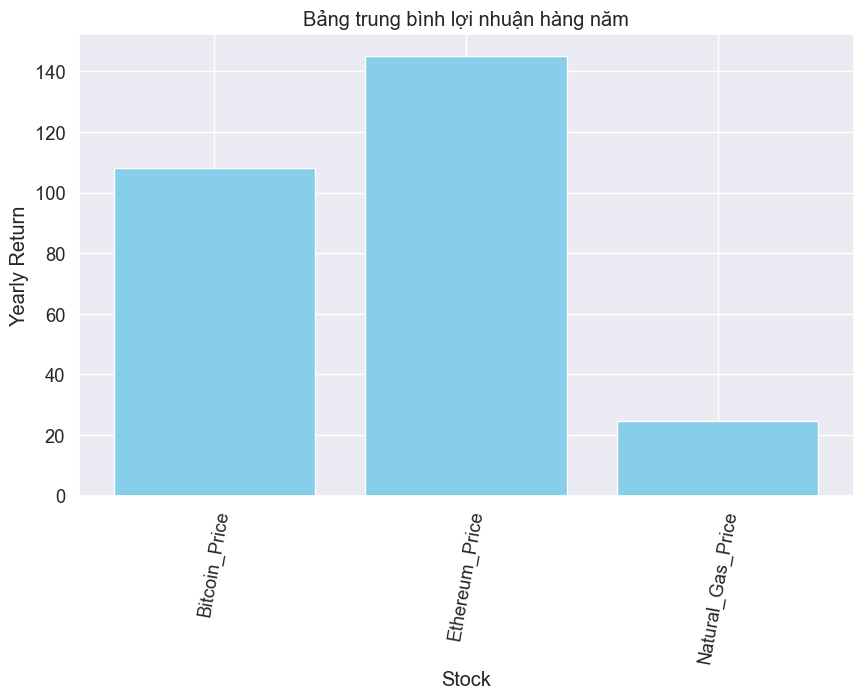

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(price, mean_daily_return_array_year,color='skyblue')
plt.xlabel('Stock')
plt.ylabel('Yearly Return')
plt.title('Bảng trung bình lợi nhuận hàng năm')
plt.xticks(rotation=80)
plt.show()

Biến động càng thấp càng đáng đầu tư

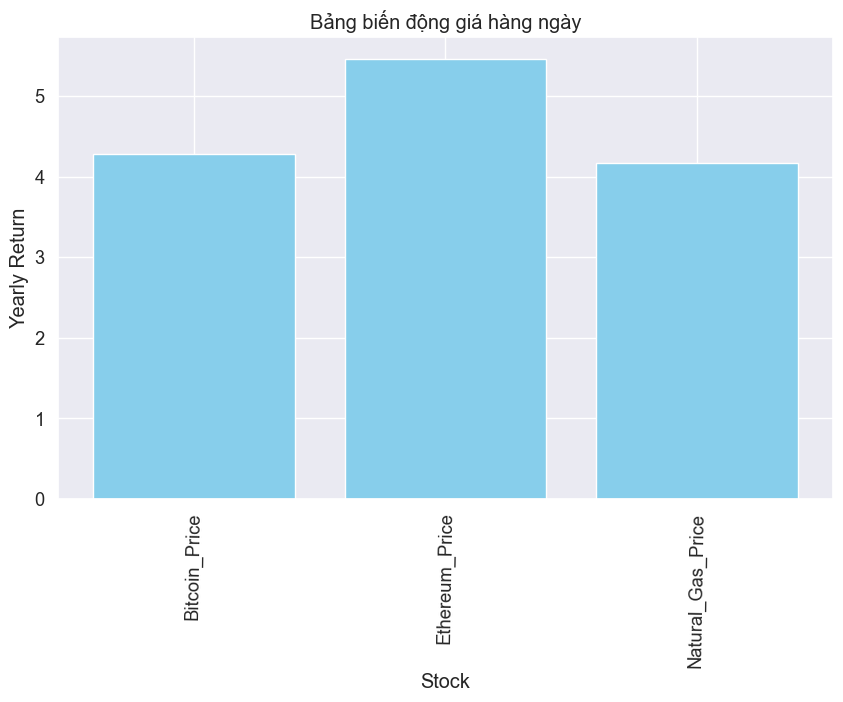

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(price, price_volatility_array,color='skyblue')
plt.xlabel('Stock')
plt.ylabel('Yearly Return')
plt.title('Bảng biến động giá hàng ngày')
plt.xticks(rotation=89)
plt.show()

In [26]:
high_corr_pairs = {}
for column in df_corr_price.columns:
    high_corr_columns = df_corr_price[column][(df_corr_price[column]) >= 0].index
    for corr_column in high_corr_columns:
        if column != corr_column:
            key = f"{column}/{corr_column}"
            value = df_corr_price[column][corr_column]
            high_corr_pairs[key] = value

In [27]:
# def remove_duplicate_values(x):
#     unique_dict = {}
#     seen_values = set()
#     for key, value in x.items():
#         if value not in seen_values:
#             unique_dict[key] = value
#             seen_values.add(value)
#     return unique_dict

# high_corr_pairs = remove_duplicate_values(high_corr_pairs)

In [28]:
keys_list = list(high_corr_pairs)

Lưu ý không kiến nghị chạy đoạn code vì đã lưu plot thành ảnh r , nếu chạy bỏ # đi

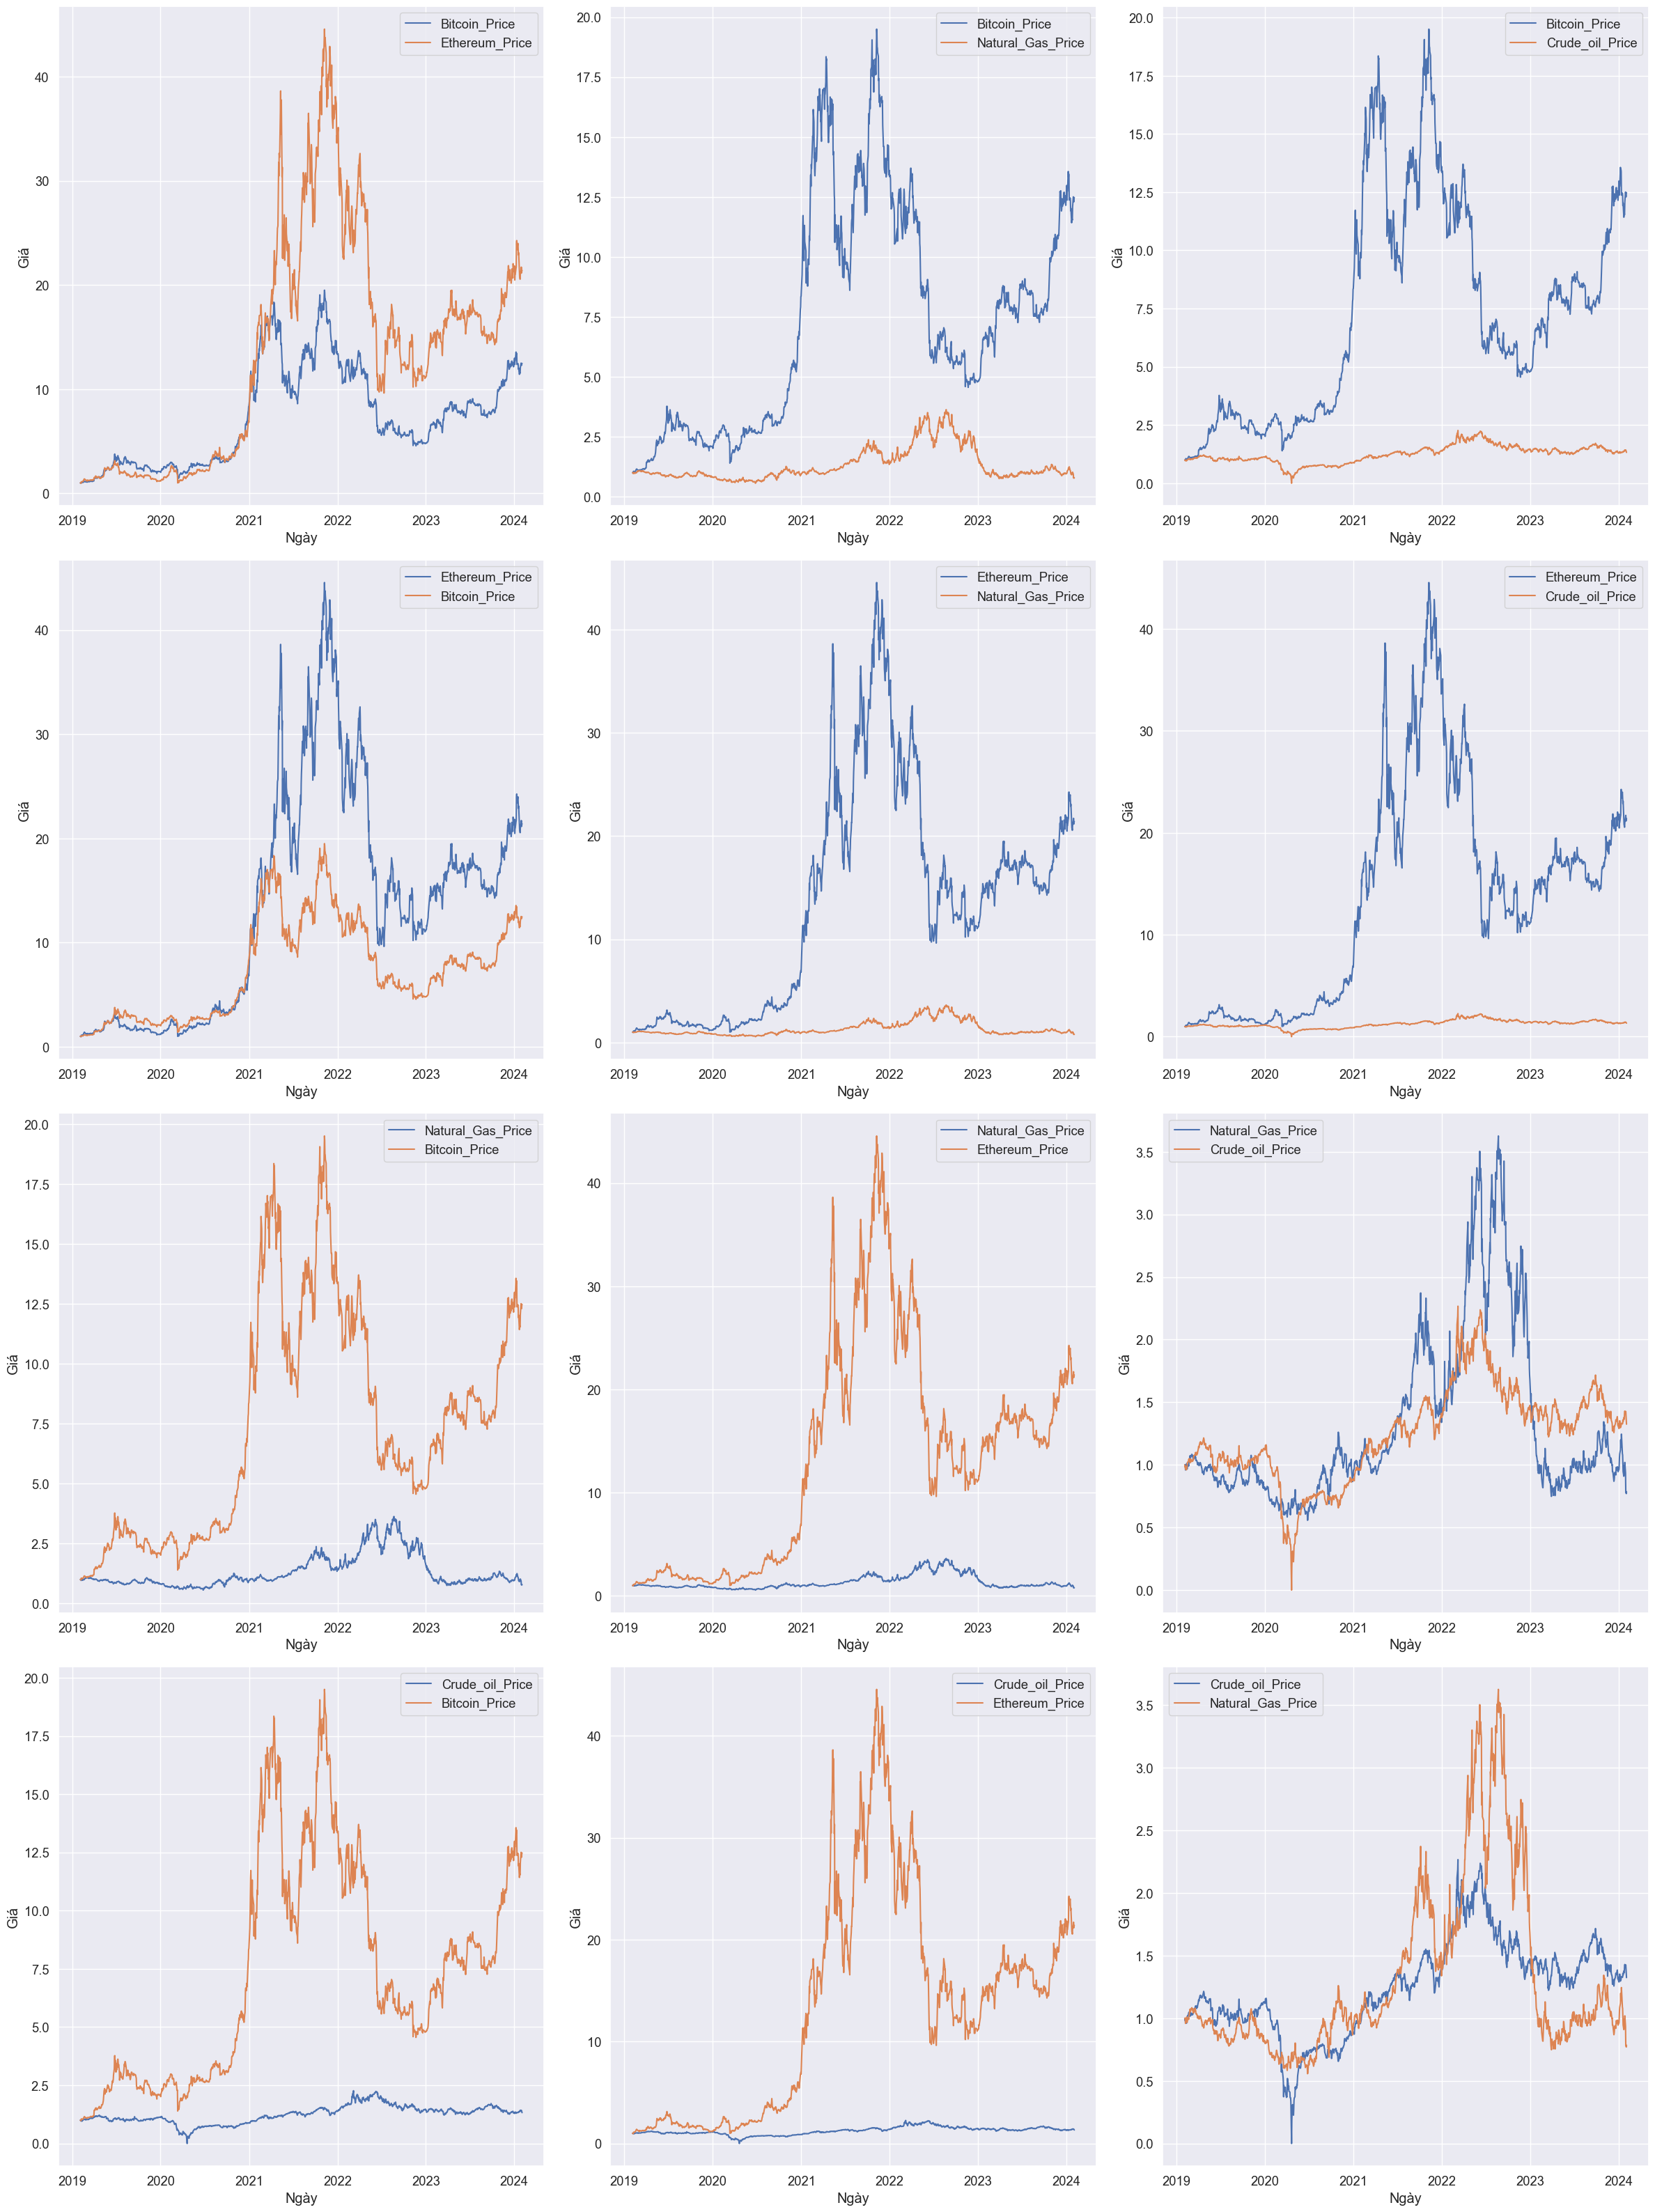

In [39]:

n_cols = 3
n_rows = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*8))

for r in range(n_rows):
    for c in range(n_cols):
        i = r * n_cols + c
        if i < len(keys_list):
            ax_i = ax[r, c]
            separated_columns = keys_list[i].split('/')
            ax_i.plot(df_price_new.index, df_price_new[separated_columns[0]], label=separated_columns[0])
            ax_i.plot(df_price_new.index, df_price_new[separated_columns[1]], label=separated_columns[1])
            ax_i.set_xlabel('Ngày')
            ax_i.set_ylabel('Giá')
            ax_i.legend()

plt.tight_layout()
plt.show()

In [30]:
df_volume=df[volume]
df_corr_volume = df_volume.corr()

c:\Users\Admin\anaconda3\envs\env_ds\lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



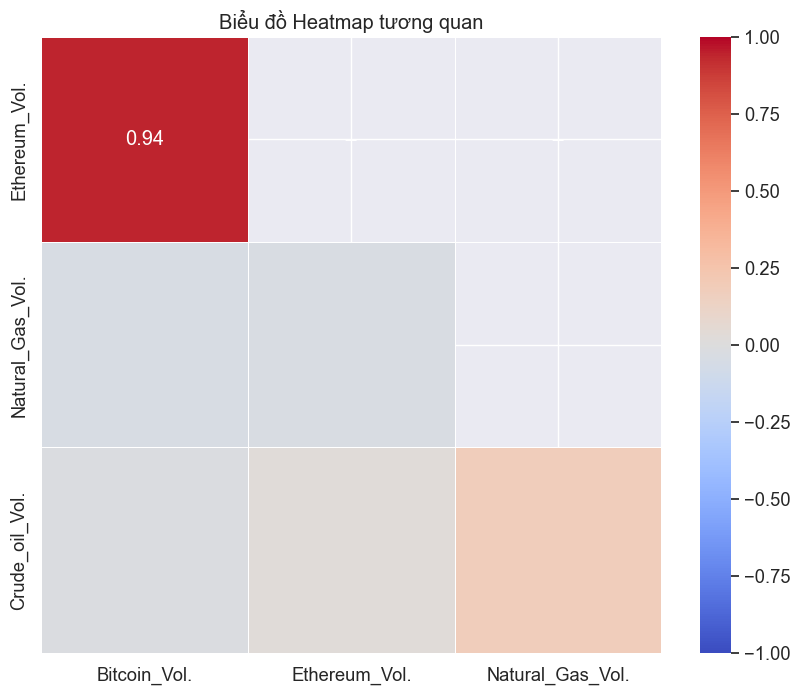

In [31]:
heatmap_corr(df_corr_volume)

In [32]:
fig = px.line(data_frame=df_volume,title='Khối lượng giao dịch hàng ngày tổng quát')
fig.show()

In [34]:
 df_volume_sum = df_volume.sum()
 df_volume_sum = df_volume_sum.reset_index()
 df_volume_sum.columns = ['Stock', 'Sum Volume']
 fig = px.bar(df_volume_sum, y='Stock', x='Sum Volume', title='Tổng khối lượng cổ phiếu của các công ty')
 fig.show()

In [35]:
 df_volume_mean = df_volume.mean()
 df_volume_mean = df_volume_mean.reset_index()
 df_volume_mean.columns = ['Stock', 'Mean Volume']
 fig = px.bar(df_volume_mean, y='Stock', x='Mean Volume', title='Trung bình khối lượng mua cổ phiếu của các công ty')
 fig.show()


In [36]:
df_volume_std = df_volume.std()
df_volume_std = df_volume_std.reset_index()
df_volume_std.columns = ['Stock', 'STD Volume']
fig = px.bar(df_volume_std, x='Stock', y='STD Volume', title='Biến động khối lượng cổ phiếu của các công ty')
fig.show()